In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [304]:
def show_mult_img_plt(rows, columns, img_names, titles, vmin=0, vmax=255, figuresize=(10,12), ax = 'off'):
    fig = plt.figure(figsize=figuresize, dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis(ax)
        plt.title(titles[i])

<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Ex 01</span> </span>  </span></p>
</div>

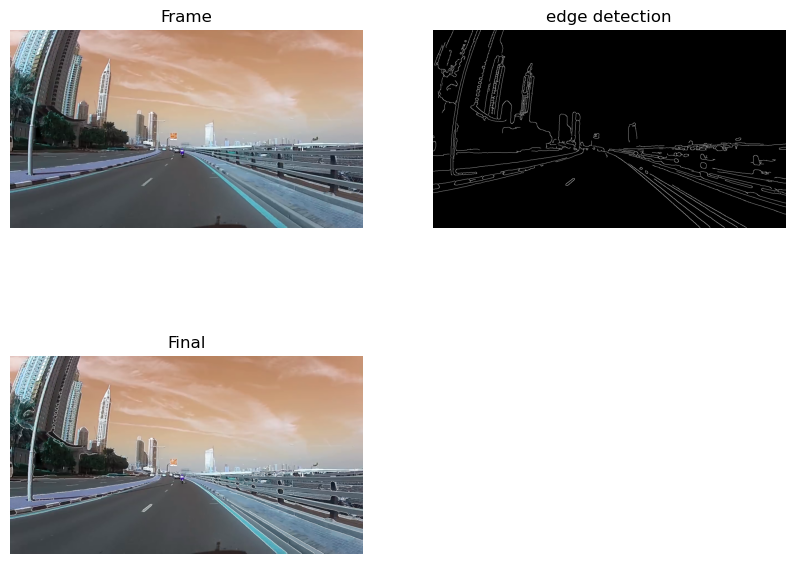

In [307]:
cap = cv2.VideoCapture('media-ex12/lane.mp4')
frame_no = 8; cap.set(cv2.CAP_PROP_POS_FRAMES,frame_no)
ret, frame = cap.read()

frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
frame_denoised = cv2.medianBlur(frame_gray,11)
frame_denoised = cv2.GaussianBlur(frame_denoised,(5,5),1)

frame_denoised_canny = cv2.Canny(frame_denoised,20,110)
image = cv2.add(frame,cv2.cvtColor(frame_denoised_canny,cv2.COLOR_GRAY2RGB))

show_mult_img_plt(3, 2, (frame, frame_denoised_canny, image),titles=["Frame", "edge detection", "Final"])
# plt.imshow(frame_denoised_canny); plt.show()
# plt.imshow(frame_denoised,cmap='gray')

<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Ex 02</span> </span>  </span></p>
</div>

## Color Photo

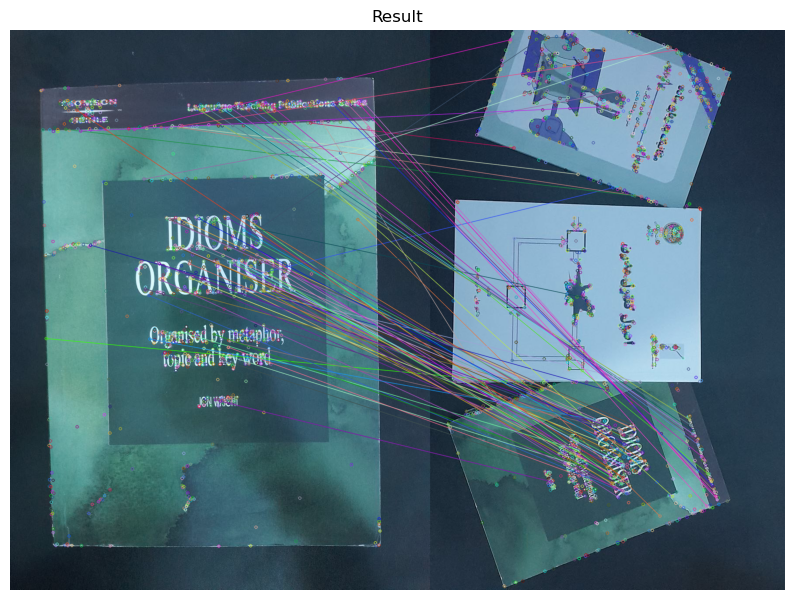

In [9]:
original_img1 = cv2.imread('media-ex12/book1.jpg') #query
original_img2 = cv2.imread('media-ex12/book2.jpg'); #train

sift = cv2.SIFT_create()

keypoint1, descriptor1 = sift.detectAndCompute(original_img1,None)
keypoint2, descriptor2 = sift.detectAndCompute(original_img2,None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptor1, descriptor2)

matches = sorted(matches, key=lambda x:x.distance)

result = cv2.drawMatches(original_img1, keypoint1, original_img2, keypoint2, matches[:100], None)

show_mult_img_plt(1, 1, (result,),titles=["Result"])

## Gray Photo

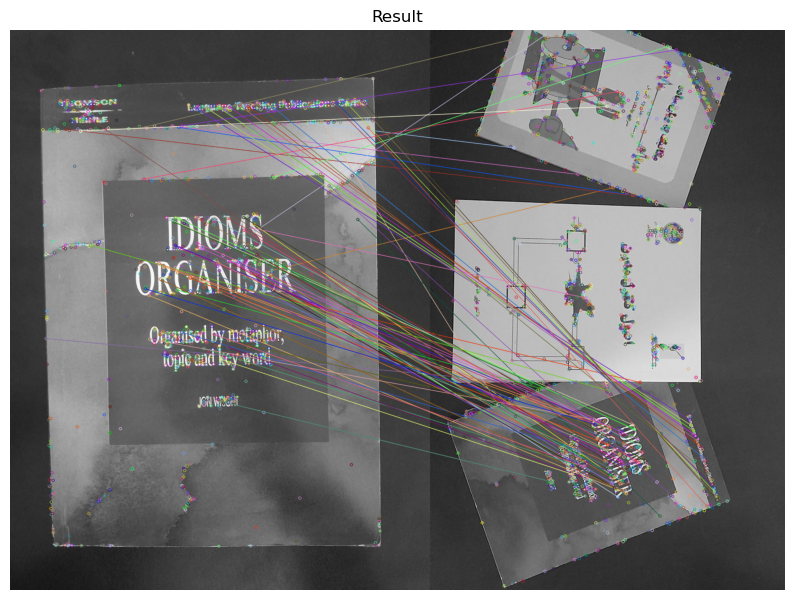

In [311]:
original_img1 = cv2.imread('media-ex12/book1.jpg') #query
original_img2 = cv2.imread('media-ex12/book2.jpg'); #train
img1 = cv2.cvtColor(original_img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(original_img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoint1_gray, descriptor1_gray = sift.detectAndCompute(img1,None)
keypoint2_gray, descriptor2_gray = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches_gray = bf.match(descriptor1_gray, descriptor2_gray)

matches_gray = sorted(matches_gray, key = lambda x:x.distance)

result_gray = cv2.drawMatches(img1, keypoint1_gray, img2, keypoint2_gray, matches_gray[:100], None)

show_mult_img_plt(1, 1, (result_gray,),titles=["Result"])

### There is not any difference between colorful and gray images in the result of the algorithm As is written on the opencv implementation that The OpenCV implementation converts color images to grayscale images before extracting features.